## The Central Limit Theorem 
#### Using 2016 Wage Data 
         
Source: https://www.kaggle.com/bls/wage-estimates?select=wm.data.1.AllData.csv


### Background:
In this notebook I will utilize the Central Limit Theorem to quantify uncertainty around sample mean estimates. 


In [53]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading data into df 
population = pd.read_csv(r"E:\Codecademy\CLT\population.csv")

In [20]:
# inspecting the columns
population.keys()

Index(['series_id', 'year', 'period', 'value', 'footnote_codes'], dtype='object')

In [21]:
# inspecting datatypes 
population.dtypes

series_id          object
year                int64
period             object
value             float64
footnote_codes    float64
dtype: object

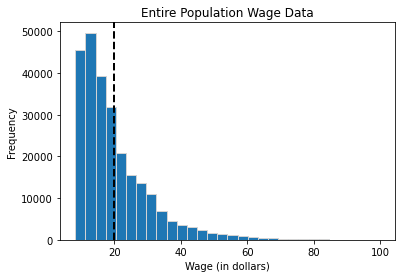

In [22]:
# creating a histogram of the true population data
plt.hist(population['value'], bins=30, edgecolor='lightgrey')
plt.axvline(np.mean(population_data['value']), color ='k', linestyle='dashed', linewidth='2')
plt.title('True Population Wage Data')
plt.xlabel('Wage (in dollars)')
plt.ylabel('Frequency')
plt.show()

In [27]:
pop_mean = population['value'].mean()
pop_median = population['value'].median()
print(f'The true average population wage is: {round(pop_mean,2)} per hour.')
print(f'The true median population wage is: {round(pop_median,2)} per hour.')

The true average population wage is: 20.04 per hour.
The true median population wage is: 16.84 per hour.


### Real Life

In real life we only observe a single sample, but in order to quantify our uncertainty about that sample, it is useful to think about what WOULD happen if we could observe more. For this reason, in the following code I will take 10,000 random samples of 150 people (instances) from the population and calculate the mean hourly wage for those samples. 

I will then inspect the 10,000 sample means to see how much they vary from the true average population wage. If there is a large amount of variation, then we can be less confident that any individual sample mean is representative of the population. Alternatively, if there is less variation between the sample and true means, we can be more confident that the sample mean is representative of the true population mean. 

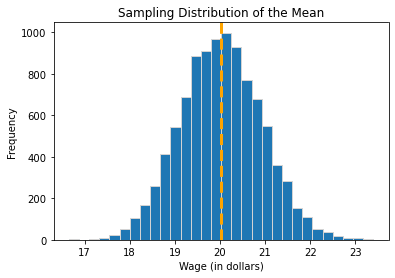

In [37]:
# creating a loop to iterate through 10000 random samples of 150 people
sample_means = []

for i in range(10000):
    samp = population_data['value'].sample(n=150, random_state=1)
    sample_means.append(np.mean(samp))

# creating a histogram of the results of the loop and plotting the mean
plt.hist(sample_means, bins = 30, edgecolor='lightgrey')
plt.axvline(np.mean(sample_means), color='orange', linestyle='dashed', linewidth=3)
plt.title('Sampling Distribution of the Mean')
plt.xlabel('Wage (in dollars)')
plt.ylabel('Frequency')
plt.show()

In [38]:
mean = np.mean(sample_means)
median = np.median(sample_means)
print(f'The mean value of the sample means is: {round(mean,2)}')
print(f'The median value of the sample means is: {round(median,2)}')

The mean value of the sample means is: 20.03
The median value of the sample means is: 20.02


### Notes on Sampling Distribution Result

* While the population distribution is very right skewed, this distribution appears to be almost normally distributed
* The average of the sample means (Gold dotted line), 20.03, is approximately equal to the truepopulation mean (20.04).
* The 10,000 sample means range approximately between 17 and 23 (plus or minus 3 dollars from the true mean).


### Calculating 95% of the Sample Means

In [49]:
percentiles = np.percentile(sample_means, [2.5, 97.5])
print(percentiles)

[18.31863 21.82017]


95% of all the sample means from the above simulation fall in the range from 18.31 to 21.82 dollars per hour (plus or minus about 1.73
from the sample mean).

### Formal Definition of the CLT

The CLT tells us that the sampling distribution of the mean:
* is normally distributed (for a large enough sample size)
* is centered at the population mean
* has a standard deviation equal to the population  standard deviation divided by the sqaure root of the sample size, otherwise known as ***Standard Error***


To simulate a real world example, we will assume we only take a single random sample and find a single mean:

In [69]:
# taking a single random sample of 150 from the population data
single_sample = population_data['value'].sample(n=150)

# finding the mean of the single random sample
single_mean = np.mean(single_sample)
print(round(single_mean,2))

20.93


#### Standard Error Calculation of Single Sample:

Because this is a simulation and we are assuming we do not know the population's standard deviation, we can use the standard deviation of the single sample to estimate it, just as we would do in a real world situation.

In [62]:
std_error = np.std(single_sample)/(150 ** 0.5)
print(std_error)

0.8176497031351733


Knowing that the CLT says that the sample distribution is normally distributed and that 95% of the normally distributed values are within about 1.96 standard deviations of the mean, we can estimate the width of the single sample distribution without actually knowing the entire population distribution. 

We do this by multiplying the standard error by 1.96:

In [70]:
round(std_error * 1.96, 2)

1.6

### Interpretation of Calculation

If we were to take a large number of samples of size 150 from a population with tha same amount of variation as in the observed sample, 95% of those samples would be within about **1.60** dollars from the true population mean. 

Therefore, there is about a 95% probablity that the observed sample mean of 20.93 is no more than 1.60 dollars away from the true population mean. In other words, **there is about a 95% probability that the true population mean is between 19.33 and 22.53.**

Note that the estimate of 1.60 is similar to the value of 1.73 that was calculated from the true population data.